[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ChecinskiBartlomiej/ML/blob/main/UM_hw_13.ipynb)

# **Last Homework – Finding Odd Shapes**

Due to the very sad events that took place on the Krakowskie Przedmieście Campus, the semester schedule has changed for the Monday and Thursday groups. To accommodate these changes, students in all groups receive a **combined homework assignment for both Class 13 and Class 14**.

## **RULES**

### **Deadline**

**The deadline for this homework is July 2nd, 23:59.**

### **Grading Criteria**

This homework will be graded on a scale from 0 to 4 points - plus a **bonus**.

- **4 points** (equivalent to completing two homework assignments worth 2 points each):
  - **the solution must attain an RMSE of 5.0 pixels or lower** (on 25,000 samples).
  - the sizes of all tensors must be annotated in comments
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **3 points** (equivalent to completing one homework assignment worth 2 points):
  - training loss curve must be plotted with a clear indication of a 5.0 pixels level
  - the sizes of all tensors must be annotated in comments
  - an in-depth textual description of the solution must be provided
  - clear attention diagrams with discussion must be included

- **2 points** (equivalent to completing one homework assignment worth 2 points):
  - missing any one of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **1 point** (equivalent to submitting an incomplete homework assignment):
  - missing any two of the following elements:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **0 points** (equivalent to not completing the homework assignment):
  - missing any three of the following:
    - training loss curve plot with a clear indication of a 5.0 pixels level
    - tensor size annotations in comments
    - in-depth textual description of the solution
    - attention diagrams with discussion

- **BONUS** – This homework encompasses all key elements from previous classes on deep neural networks.  
As a result, any student who obtains an **RMSE of 3.0 pixels or below** (on 25,000 samples), and whose solution would otherwise qualify for 4 points, **will receive the full 14 points** — equivalent to completing all homework assignments related to deep learning — regardless of their previous scores.



## **HOMEWORK ASSIGNMENT DESCRIPTION AND INSTRUCTIONS**

### **Online Dataset**

The code provided below generates an *online* dataset `OddXYDataset`.

The term *online* means that the dataset does not have a fixed set of pre-generated examples (like a traditional training set of fixed size). Instead, new samples are generated dynamically each time they are requested.

While the number of possible examples is finite in principle, it is so large that — for practical purposes — we can consider it to be effectively infinite.

In this setting, there is no need to use a separate validation or test set: the training error itself is a good estimate of the generalization error, since every training sample is new and unseen.

Consequently, the notion of an *epoch* becomes a matter of convention. For this assignment, we define one epoch as processing 25,000 training examples.

### **Training strategies**

Overfitting is not a problem in the *online* setting — but training can still stagnate in local minima or flat regions of the loss landscape.  
To address this, you will likely need to try one or more of the following strategies:

- **Multiple restarts** with different random seed values;
- **Adaptive learning rate** — consider researching training schedulers (this topic was not covered in class);
- **Progressive model growth** — start with a simpler architecture and gradually add components during training,
  so that the parts already present can learn what to do before the rest is introduced.

### **DataLoader**

The `show_examples()` function demonstrate how to wrap the dataset into a `torch.utils.data.DataLoader` so it becomes directly usable for the training/testing of a neural network.

### **Data Description**

By examining the provided code and a few sample images generated from this dataset, you will notice that:

1. **Each data sample** is a 64×64 black-and-white image with the following characteristics:
  - It contains several shapes of the same type (either circles, triangles, or squares), randomly placed and varying in size;
  - It includes one additional shape of a different type — the *odd* shape — also placed at a random location;
  
  **Note that these shapes may overlap partially or even completely, potentially hiding the odd shape.**

2. **The label** associated with each image is a 2D point indicating the coordinates of the center of the odd shape.

### **The Homework Objective**

Students should design an architecture of an **attention-based neural network** and train it so that it attains an RMSE (Root Mean Square Error, defined as the square root of the MSE) of **5.0 or lower**. Due to the nature of the online dataset, there is no need to test the solution on a separate test set.

Students should visualize the attention matrices in the trained network and **discuss what they observe** — not just describe them.  
Focus on interpreting the patterns: Where is the model attending? Are there any consistent behaviors across samples? Does attention correlate with the position of the odd shape? What do surprising or unclear patterns tell us?

A few technical requirements to observe:

- Seed all random number generators so that (1) your results are replicable and (2) I can rerun your solution and obtain the same output — *in case I need to check something*.

- Make sure your Colab file contains a **fully trained solution** with:
  - printed training output,
  - attention diagrams,
  - and a plot of the training loss curve.

This way, I don’t have to rerun your code unless absolutely necessary.

### **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.

## **SOLUTION SUGGESTIONS**

Students **do not need to follow these suggestions** — these are simply the strategies that worked for me.

The goal of the homework is, of course, to find the location of the odd shape. For that reason, it seems worthwhile to consider a *position-aware* variant of the post-processing of attention results. The solution I propose consists of the following components:


0. **Input**  
   Our input is a black-and-white image with 1 channel, of size 64×64 pixels.

1. **Embedding**  
  In class, we embedded a sequence of tokens in a multidimensional space, resulting in a sequence of embeddings. We also saw how such sequences are compatible with positional encoding and attention mechanisms used in subsequent stages.

  Here, we need to process an image that contains shapes of interest at various spatial locations.  
  To do this, I designed a Convolutional Neural Network with:
  - 1 input channel,
  - an input grid of 64x64 pixels,
  - and an output feature map arranged as a 12x12 grid with 16 channels.

  I used **no padding**, and each output neuron has a **receptive field of size 20x20** with a **stride of 4x4**.  
  This architectural choice yields **144 distinct positions** (12x12), each represented by a 16-dimensional feature vector.

  We can treat this as a sequence of 144 embeddings in 16-dimensional space — making it fully compatible with the attention mechanisms used later in the model.


2. **Positional Encoding**  
  I applied sinusoidal positional encoding, just like in class, using 16 positional dimensions to match the 16 feature dimensions of the image embeddings.  

  Positions were encoded based on their indices from 0 to 143.

3. **Attention**  
   I used full self-attention, where input tokens are linearly projected into Query, Key, and Value vectors using learned matrices.

4. **Post-Processing**  
   The classifier was implemented as a 2-layer MLP and applied **token-wise**, without averaging over positions.  

   This corresponds to the **position-aware** variant of post-processing the attention results, as discussed in class.

   As a result, the model produced a **logit for each of the 144 spatial locations**, which was then converted with `softmax` into a **probability distribution** over positions — representing the likelihood of the odd shape being located at each position.


5. **Final Prediction**  
   We know the exact position (center) of each of the 144 rectangular receptive fields of the embedding network. Since we also have the **probability** of each field being the target location (from the classifier), we can compute the **expected position** as a weighted average of receptive field centers. In what follows I will call it *soft argmax*.

   **Example:**

   Suppose we had only 4 output rectangles (instead of 144), with centers at:  
   $$(16, 16),\ (16, 48),\ (48, 16),\ \text{and } (48, 48).$$  
   and suppose the probabilities from the post-processing stage were:  
   $$(0.1,\ 0.2,\ 0.69999,\ 0.00001).$$  
   Then the predicted center would be:
   $$
   \begin{align*}
   x &= 16 \cdot 0.1 + 16 \cdot 0.2 + 48 \cdot 0.69999 + 48 \cdot 0.00001 \\
   y &= 16 \cdot 0.1 + 48 \cdot 0.2 + 16 \cdot 0.69999 + 48 \cdot 0.00001
   \end{align*}
   $$

   which yields an interpretable, differentiable prediction for the (x, y) location of the odd shape (*soft argmax*).

**The above steps bring the RMSE below 4.0 pixels.**  
However, the result depends on the network initialization — it is seed-dependent — so it's worth restarting the training a few times with different seeds to find a better-performing run.

To improve this result further, though, we'll have to work a bit harder. Here's how:


6. **Offset Regressor**

  The soft-argmax mechanism in step 5 identifies the **center** of the most probable receptive field, but it cannot fine-tune the prediction within that field. For example, if the odd shape is located in the **lower-left corner** of a receptive field, the best the model can do is predict the **center** of that rectangle — introducing a systematic error.

  *One may argue:* the design naturally accounts for a more nuanced case. When the odd shape lies **across the boundary between two receptive fields**, the attention distribution may spread across both regions. In such cases, the soft-argmax prediction becomes a **weighted average** of the centers of the adjacent fields. This behavior is a built-in **feature of the design** that allows the model to predict positions **off-center**, somewhere in between fields.

  *To that I would reply:* this is true — but it comes with a trade-off. When attention is distributed across multiple regions, it becomes **less clear which shapes are *regular* and which one is *odd***. This added ambiguity may make it harder for the network to reach a confident decision, especially in the early stages of training.

  To address this systematic limitation in a more structured way, I introduced an additional **2-layer MLP regressor**, applied **token-wise** to each of the 144 positions. This regressor takes the same attention output used by the classifier in step 4 and predicts a **local offset** $(\Delta x, \Delta y)$ within each receptive field. These offsets are then **aggregated** using the probabilities from step 4, resulting in a **soft average correction vector**.

  Note that the attention mechanism must learn to extract — from the original features — both:
  - the **probability** that the odd shape is located at a given position, and  
  - the **local coordinates** of that shape *within* the respective receptive field.


7. **Refined Prediction**

  The final predicted position is obtained by summing the **coarse prediction** from step 5 and the **fine-grained correction** from step 6. This allows the model to make accurate, differentiable predictions at **sub-receptive-field resolution**, resulting in significantly improved localization.

  **In summary:**

  - Step 5: predicts the expected center of the relevant receptive field (via soft-argmax);
  - Step 6: estimates a fine-grained, attention-weighted offset within that field;
  - Step 7: adds both components to produce the final prediction:

$$
\text{final prediction} = \underbrace{\sum_i p_i \cdot C_i}_{\text{soft argmax}} + \underbrace{\sum_i p_i \cdot (\Delta x, \Delta y)_i}_{\text{fine correction offset}}
$$


However, I was not able to train this network end-to-end from scratch — it seems that the two heads (the classifier inferring probabilities and the regressor inferring fine-grained corrections) were not able to learn their roles *simultaneously*.  

To solve this, I adopted a **progressive model growth** training strategy:

- First, I trained a one-headed version of the network (without steps 6 and 7) until the RMSE reached approximately 4.0 — a clear indication that the probability distribution was being inferred correctly.
- Then, I copied all weights into a new, complete two-headed network and continued training from that point.

**This strategy brought the RMSE down to 2.65 pixels.**

Let's start with utility chunk of code where required libraries are imported, hyperparameters are defined and plotting functions are written.

In [29]:
import torch
import torch.nn.functional as F
import math
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from torch.utils.data import DataLoader
import time
import random
from PIL import Image, ImageDraw
from torch.utils.data import Dataset, DataLoader

# Hyperparameters.
epochs = 2000
epoch_size = 25000
batch_size = 1024
num_heads = 8
d_emb = 32
lr = 1e-3
wd = 1e-4

# Compute centers.
rf_center = (20 - 1) / 2  
centers = torch.tensor([(i*4 + rf_center, j*4 + rf_center)for i in range(12) for j in range(12)])  # (144,2)

# Set seed.
seed = 5
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
g = torch.Generator()
g.manual_seed(seed)

# ============================================================
# 1. Online dataset: 64×64, target = (cx,cy) ∈ [0,63]²  (float32)
# ============================================================
IMAGE = 64
SHAPES = ("circle", "square", "triangle")

def draw_shape(drawer, shape_type, center_x, center_y, radius):
    if shape_type == "circle":
        drawer.ellipse([center_x - radius, center_y - radius,
                        center_x + radius, center_y + radius], fill="black")
    elif shape_type == "square":
        drawer.rectangle([center_x - radius, center_y - radius,
                          center_x + radius, center_y + radius], fill="black")
    else:  # triangle
        drawer.polygon([
            (center_x, center_y - radius),
            (center_x - radius, center_y + radius),
            (center_x + radius, center_y + radius)
        ], fill="black")

class OddXYDataset(Dataset):
    """
    Generates images on-the-fly:
      * several random shapes of the same type
      * 1 additional shape of a different type
    Returns:
      * image (1×64×64 tensor, float32 normalized to [0,1])
      * label: float tensor [cx, cy] with center of the odd shape
    Arguments:
        num_samples             – total number of samples in the dataset
        same_shape_count_range – tuple (min, max), number of identical shapes
        shape_radius_range      – tuple (min_radius, max_radius) for shape size
    """
    def __init__(self,
                 num_samples,
                 same_shape_count_range=(3, 6),
                 shape_radius_range=(4, 10)):
        self.num_samples = num_samples
        self.same_shape_count_range = same_shape_count_range
        self.radius_min, self.radius_max = shape_radius_range

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        base_shape = random.choice(SHAPES)
        odd_shape = random.choice([s for s in SHAPES if s != base_shape])

        img = Image.new("L", (IMAGE, IMAGE), "white")
        drawer = ImageDraw.Draw(img)

        # draw identical shapes
        for _ in range(random.randint(*self.same_shape_count_range)):
            radius = random.randint(self.radius_min, self.radius_max)
            cx = random.randint(radius, IMAGE - radius - 1)
            cy = random.randint(radius, IMAGE - radius - 1)
            draw_shape(drawer, base_shape, cx, cy, radius)

        # draw the odd shape (with known center)
        radius = random.randint(self.radius_min, self.radius_max)
        cx = random.randint(radius, IMAGE - radius - 1)
        cy = random.randint(radius, IMAGE - radius - 1)
        draw_shape(drawer, odd_shape, cx, cy, radius)

        img_tensor = torch.tensor(np.array(img), dtype=torch.float32).unsqueeze(0) / 255.
        label_tensor = torch.tensor([float(cx), float(cy)], dtype=torch.float32)
        return img_tensor, label_tensor
    
def show_examples(num_examples=10):
    """
    Displays a grid of image samples from OddXYDataset using a DataLoader with batch_size=1.

    Args:
        num_examples (int): Number of examples to display.
    """
    dataset = OddXYDataset(num_samples=num_examples)
    dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

    num_columns = 5
    num_rows = math.ceil(num_examples / num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2, num_rows * 2))

    for i, (image, label) in enumerate(dataloader):
        if i >= num_examples:
            break
        image_np = image.squeeze(0).squeeze(0).numpy()  # B=1,C=1,H,W --> H,W
        cx, cy = label.squeeze(0)                       # B=1,2       --> 2
        axes.flat[i].imshow(image_np, cmap="gray")
        axes.flat[i].set_title(f"({cx:.0f},{cy:.0f})")
        axes.flat[i].axis("off")

    for j in range(i + 1, num_rows * num_columns):
        axes.flat[j].axis("off")

    plt.tight_layout()
    plt.show()

def plot_heatmaps(probs, labels, centers):
    probs_np   = probs.cpu().numpy()
    labels_np  = labels.cpu().numpy()
    centers_np = centers.cpu().numpy()
    B = probs_np.shape[0]
    vmin = probs_np.min()          
    vmax = probs_np.max() 

    fig, axes = plt.subplots(1, B, figsize=(B * 3, 3), constrained_layout=True)
    for i in range(B):
        ax = axes[i] if B > 1 else axes
        fmap = probs_np[i].reshape(12, 12)
        im = ax.imshow(fmap, cmap="hot", interpolation="nearest", vmin=vmin, vmax=vmax)
        dists = np.linalg.norm(centers_np - labels_np[i], axis=1)
        idx   = np.argmin(dists)
        r = idx // 12
        c = idx % 12
        ax.scatter(c, r, s=80, c="cyan", marker="X")
        ax.set_title(f"Sample {i}")
        ax.axis("off")

    cbar = fig.colorbar(im, ax=axes,orientation="vertical", fraction=0.02, pad=0.04)
    cbar.set_label("Probability")
    legend_elem = [Line2D([0], [0], marker="X", color="cyan", linestyle="", markersize=10)]
    fig.legend(legend_elem, ["True center"], loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=1, frameon=False)
    plt.show()

def plot_attention_maps(attn_weights):
    attn = attn_weights.cpu().numpy() #(B,S,S)
    B, S, _ = attn.shape
    fig, axes = plt.subplots(1, B, figsize=(B * 3, 3), constrained_layout=True)
    for i in range(B):
        ax = axes[i] if B > 1 else axes
        im = ax.imshow(attn[i], cmap="viridis", interpolation="nearest")
        ax.set_title(f"Sample {i}")
        ax.axis("off")

    fig.suptitle("attention matrices", fontsize=16)
    fig.colorbar(im, ax=axes.ravel().tolist(), fraction=0.02, pad=0.04)
    plt.show()

def plot_two_nn(coords_backbone, coords_full, labels_np, images_np):
    fig, axes = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        ax = axes[i]
        img = images_np[i,0]
        ax.imshow(img, cmap="gray", vmin=0, vmax=1)
        ax.scatter(labels_np[i,0], labels_np[i,1],
               c="yellow", marker="o", s=100, label="True")
        ax.scatter(coords_backbone[i,0], coords_backbone[i,1],
               c="cyan", marker="x", s=100, label="Backbone")
        ax.scatter(coords_full[i,0], coords_full[i,1],
               c="magenta", marker="+", s=100, label="Backbone+Offset")
        ax.set_title(f"Sample {i}")
        ax.axis("off")

    handles, labels_ = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels_, loc="lower center", ncol=3, frameon=False)
    plt.tight_layout(rect=[0,0.1,1,1])
    plt.show()

We are working with 64 x 64 images. In each image there are a few same objects (geometric figures) and one odd object. The goal is to find the center of odd object.

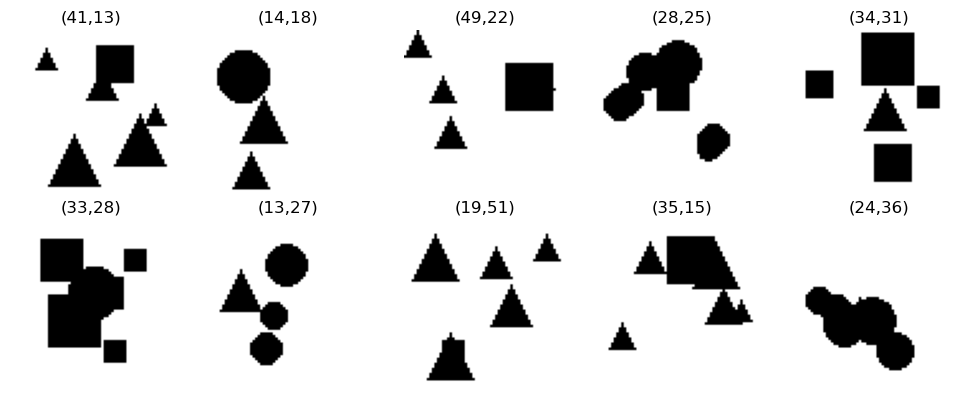

In [30]:
show_examples()

Now let's define standard sinusoidal positional encoding.

In [31]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model: int, max_len: int = 144):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)  
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))              
        pe[:, 0::2] = torch.sin(position * div_term)  
        pe[:, 1::2] = torch.cos(position * div_term)  
        self.register_buffer('pe', pe.unsqueeze(0))   

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        seq_len = x.size(1)
        return x + self.pe[:, :seq_len, :]

Our network will consists of a backbone and an offset module. The backbone takes a 64×64 image and, through convolutional layer, produces a feature map of size d_emb×12×12, which is then reshaped into 144 tokens of dimension d_emb, each covering a 20×20 patch of the original image. These tokens exchange information via attention mechanism, enabling each patch to attend to all others in search of anomalies. From the resulting features, we compute an oddness score for each patch, normalize these scores into a probability distribution, and use a soft-argmax to predict the location of the odd shape. Let's implement that.

In [32]:
class NN_backbone(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = torch.nn.Conv2d(in_channels=1, out_channels=d_emb, kernel_size=20, stride=4, padding=0)
        self.pe = PositionalEncoding(d_emb, 144)
        self.attention = nn.MultiheadAttention(embed_dim=d_emb, num_heads=num_heads, batch_first=True)
        self.classifier = nn.Sequential(nn.Linear(d_emb, 64), nn.ReLU(), nn.Linear(64, 1)) 
        self.register_buffer('centers', centers)

    def forward(self, x):
        x = self.conv(x) #(B,d_emb,12,12)    
        x = x.flatten(start_dim=2) #(B,d_emb,144)
        x = x.transpose(1,2) #(B,144,d_emb)
        x = self.pe(x) #(B,144,d_emb)
        x, attention_weights = self.attention(x, x, x, need_weights=True) #(B,144,d_emb), (B,144,144)
        logits = self.classifier(x).squeeze(-1) #(B,144)
        probs = F.softmax(logits, dim=1) #(B,144)                          
        coords = probs @ self.centers #(B,2)
        return coords, probs, attention_weights

We are ready to train our network.

Working on cuda
Epoch 200 Average Loss 77.8742
Epoch 400 Average Loss 47.4602
Epoch 600 Average Loss 39.0147
Epoch 800 Average Loss 35.9309
Epoch 1000 Average Loss 33.0350
Epoch 1200 Average Loss 30.4786
Epoch 1400 Average Loss 28.0762
Epoch 1600 Average Loss 26.6123
Epoch 1800 Average Loss 25.4717
Epoch 2000 Average Loss 24.1854


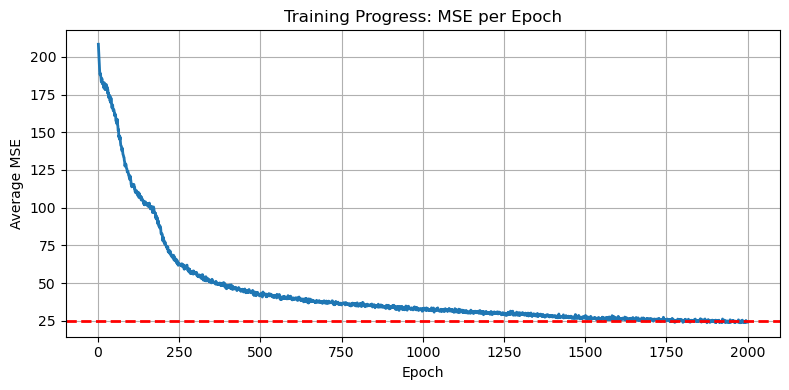

Elapsed time: 4450.7264 seconds


In [33]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Working on {device}")
backbone = NN_backbone().to(device) 
optimizer = torch.optim.AdamW(backbone.parameters(), lr=lr, weight_decay=wd) 
backbone.train()

def train_backbone():
    epoch_losses = []
    for epoch in range(1, epochs+1):
        dataset = OddXYDataset(num_samples=epoch_size)
        dataloader = DataLoader(dataset,batch_size=batch_size, shuffle=True, generator=g) 
        running_loss = 0.0
        batch_count = 0
        for batch, data in enumerate(dataloader):
            batch_inputs, batch_labels = data
            batch_inputs = batch_inputs.to(device)  
            batch_labels = batch_labels.to(device)
            optimizer.zero_grad()
            batch_outputs, _, _ = backbone(batch_inputs)                                       
            loss = F.mse_loss(batch_outputs, batch_labels)
            running_loss += loss.item()
            loss.backward()       
            optimizer.step()
            batch_count += 1   

        epoch_loss = running_loss / batch_count
        epoch_losses.append(epoch_loss)
        if epoch % 200 == 0:
            print(f"Epoch {epoch} Average Loss {epoch_loss:.4f}")

    plt.figure(figsize=(8, 4))
    plt.plot(range(1, epochs+1), epoch_losses, linewidth=2)
    plt.axhline(y=25, color='red', linestyle='--', linewidth=2, label='MSE = 25')
    plt.title('Training Progress: MSE per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Average MSE')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

start = time.time()
train_backbone()
end = time.time()
print(f"Elapsed time: {end - start:.4f} seconds")

=== After training ===
True coordinates:
 [[10. 11.]
 [15. 36.]
 [42. 48.]
 [18. 21.]
 [34. 51.]]
Predicted coordinates:
 [[16.0962   11.964176]
 [14.532257 36.743374]
 [43.751022 47.41023 ]
 [20.45774  17.592686]
 [40.371254 46.939037]]


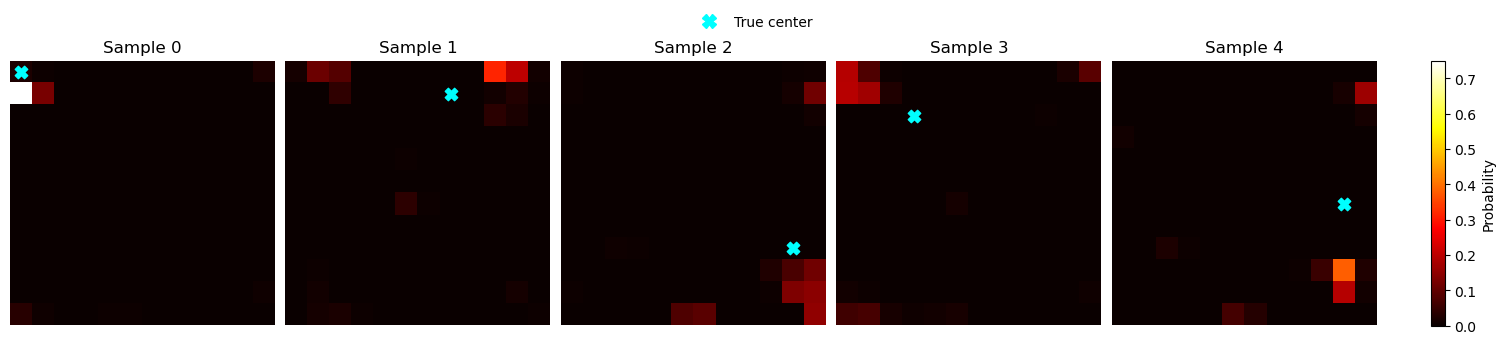

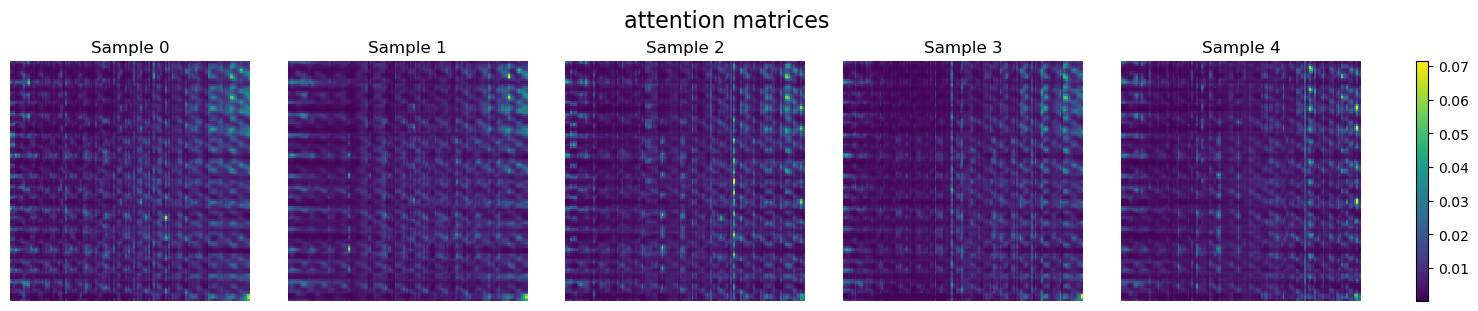

In [54]:
# Few examples.
sample_ds = OddXYDataset(num_samples=5)
sample_loader = DataLoader(sample_ds, batch_size=5, shuffle=False)
sample_inputs, sample_labels = next(iter(sample_loader))
sample_inputs = sample_inputs.to(device)
sample_labels = sample_labels.to(device)

backbone.eval()
with torch.no_grad():
    coords, probs, attention_weights = backbone(sample_inputs)
print("=== After training ===")
print("True coordinates:\n", sample_labels.cpu().numpy())
print("Predicted coordinates:\n", coords.cpu().numpy())
plot_heatmaps(probs, sample_labels, backbone.centers)
plot_attention_maps(attention_weights)

In attention matrices vertical strips dominate. This indicates that some tokens (20x20 receptive fields) are special, in our case these are good candidates for an odd shape.

At this stage our network identifies the center of the most probable receptive field but it cannot fine-tune the prediction within that field. To overcome this we define second neural network which will be responsible for predicting offset at each receptive field. We will use weights from previous neural network and build on top of that.

In [35]:
epochs      = 2000
epoch_size  = 25000      
batch_size  = 1024      
lr_backbone = 1e-5       
lr_offset   = 1e-3                

class NN_backbone_with_offset(nn.Module):
    def __init__(self, pretrained_model):
        super().__init__()
        self.conv        = pretrained_model.conv
        self.pe          = pretrained_model.pe
        self.attention   = pretrained_model.attention
        self.classifier  = pretrained_model.classifier
        self.register_buffer('centers', pretrained_model.centers)
        # new parameters
        self.offset_regressor = nn.Sequential(
            nn.Linear(d_emb, 64),
            nn.ReLU(),
            nn.Linear(64, 2),
        )

    def forward(self, x):
        x = self.conv(x) #(B,d_emb,12,12)
        x = x.flatten(2) #(B,d_emb,144)
        x = x.transpose(1, 2) #(B,144,d_emb)
        x = self.pe(x)  #(B,144,d_emb)
        x, attn = self.attention(x, x, x, need_weights=True) #(B,144,e_emb), (B,144,144)
        
        logits = self.classifier(x).squeeze(-1) #(B,144)
        probs  = F.softmax(logits, dim=1) #(B,144)
        argmax1 = probs @ self.centers #(B,2)
        
        offsets = self.offset_regressor(x) #(B,144,2)
        argmax2 = (probs.unsqueeze(1) @ offsets).squeeze(1)  #(B,2)

        return argmax1 + argmax2, probs, attn, offsets

We will set lower learning rate for backbone part and bigger for not trained yet offset part.

Epoch  200/2000  MSE: 20.8474
Epoch  400/2000  MSE: 20.1718
Epoch  600/2000  MSE: 19.6468
Epoch  800/2000  MSE: 20.0557
Epoch 1000/2000  MSE: 19.7454
Epoch 1200/2000  MSE: 19.9365
Epoch 1400/2000  MSE: 19.8346
Epoch 1600/2000  MSE: 19.1924
Epoch 1800/2000  MSE: 19.0415
Epoch 2000/2000  MSE: 19.1456


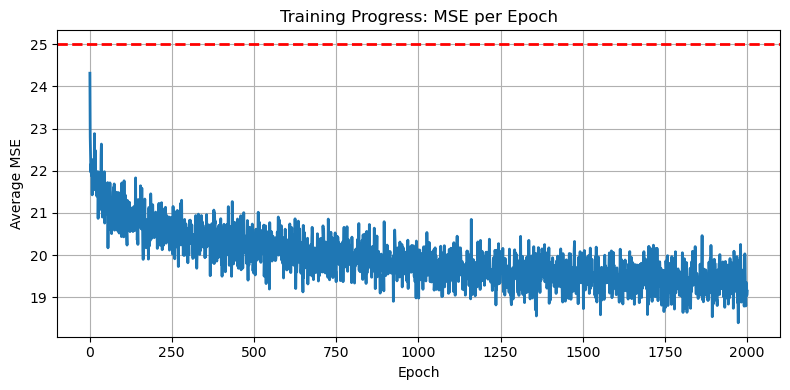

Elapsed time: 6125.7340 seconds


In [36]:
backbone_with_offset = NN_backbone_with_offset(backbone).to(device)
optimizer = torch.optim.AdamW([
    {'params': backbone_with_offset.offset_regressor.parameters(), 'lr': lr_offset},
    {'params': [p for n,p in backbone.named_parameters() if "offset_regressor" not in n], 'lr': lr_backbone}], weight_decay=wd)

backbone_with_offset.train()
def train_offset():
    epoch_losses = []
    for epoch in range(1, epochs+1):
        running_loss = 0.0
        dataloader = DataLoader(OddXYDataset(num_samples=epoch_size),batch_size=batch_size,shuffle=True, generator=g)
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            preds, _, _, _ = backbone_with_offset(x)
            loss = F.mse_loss(preds, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        avg_loss = running_loss / len(dataloader)
        epoch_losses.append(avg_loss)
        if epoch % 200 == 0:
            print(f"Epoch {epoch:4d}/{epochs:4d}  MSE: {avg_loss:.4f}")
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, epochs+1), epoch_losses, linewidth=2)
    plt.axhline(y=25, color='red', linestyle='--', linewidth=2, label='MSE = 25')
    plt.title('Training Progress: MSE per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Average MSE')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

start = time.time()
train_offset()
end = time.time()
print(f"Elapsed time: {end - start:.4f} seconds")

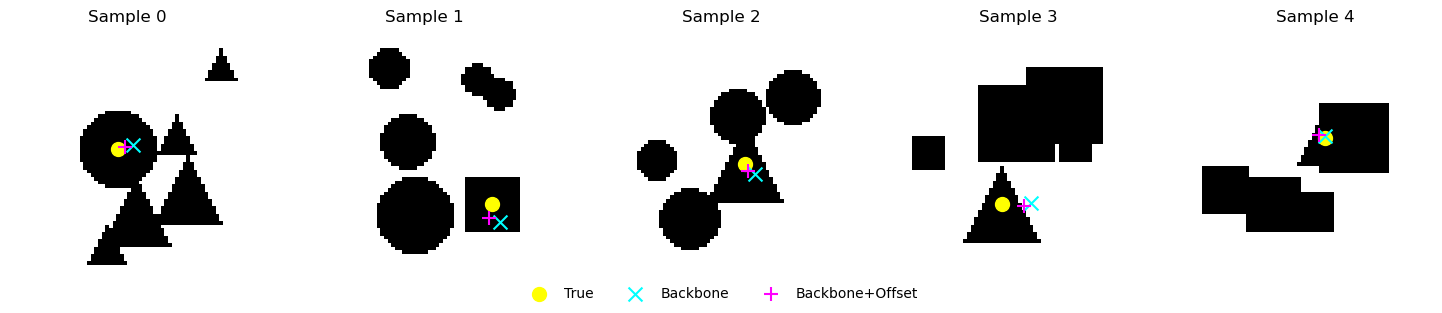

In [46]:
# Few examples
sample_ds = OddXYDataset(num_samples=5)
sample_loader = DataLoader(sample_ds, batch_size=5, shuffle=False)
images, labels = next(iter(sample_loader))
images = images.to(device)
labels = labels.to(device)

# Run both backbone and backbone with offset
backbone_with_offset.eval()
with torch.no_grad():
    coords_backbone, _, _ = backbone(images)        
    coords_full, _, _, _ = backbone_with_offset(images)         

coords_backbone = coords_backbone.cpu().numpy()
coords_full     = coords_full.cpu().numpy()
labels_np       = labels.cpu().numpy()
images_np       = images.cpu().numpy() #(5,1,64,64)
plot_two_nn(coords_backbone, coords_full, labels_np, images_np)

As we can see second part of neural network decreased loss. On displayed pictures we can see that predictions from neural network with both parts are more accurate.